# CpG Values of Smoking and Non Smoking Patients

## About Dataset
### Context
The CpG sites or CG sites are regions of DNA where a cytosine nucleotide is followed by a guanine nucleotide in the linear sequence of bases along its 5' → 3' direction. CpG sites occur with high frequency in genomic regions called CpG islands (or CG islands). Cytosines in CpG dinucleotides can be methylated to form 5-methylcytosines. Enzymes that add a methyl group are called DNA methyltransferases. In mammals, 70% to 80% of CpG cytosines are methylated.[1] Methylating the cytosine within a gene can change its expression, a mechanism that is part of a larger field of science studying gene regulation that is called epigenetics.


## Inspiration
It can be interesting explore  is the most important factors for smokers among The CpG sites - **feature importance**. 

## Objective - classification



In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
plt.rc('figure',figsize=(17,10))
sns.set_context('paper',font_scale=2)

In [40]:
data = pd.read_csv('Smoker_Epigenetic_df.csv', on_bad_lines='skip')
data.head()

,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [41]:
print('The shape of our data is:', data.shape)
print(data.info())

The shape of our data is: (683, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GSM             683 non-null    object 
 1   Smoking Status  683 non-null    object 
 2   Gender          683 non-null    object 
 3   Age             683 non-null    int64  
 4   cg00050873      621 non-null    float64
 5   cg00212031      621 non-null    float64
 6   cg00213748      621 non-null    float64
 7   cg00214611      621 non-null    float64
 8   cg00455876      621 non-null    float64
 9   cg01707559      621 non-null    float64
 10  cg02004872      621 non-null    float64
 11  cg02011394      621 non-null    float64
 12  cg02050847      621 non-null    float64
 13  cg02233190      621 non-null    float64
 14  cg02494853      621 non-null    float64
 15  cg02839557      621 non-null    float64
 16  cg02842889      621 non-null    float64
 17 

In [44]:
print(data.columns)
print()
print(data['Gender'].unique())
print()
data['Gender'] = data['Gender'].map({' f':0,' m':1,' F':0,' M':1}).astype(int)

Index(['GSM', 'Smoking Status', 'Gender', 'Age', 'cg00050873', 'cg00212031',
       'cg00213748', 'cg00214611', 'cg00455876', 'cg01707559', 'cg02004872',
       'cg02011394', 'cg02050847', 'cg02233190', 'cg02494853', 'cg02839557',
       'cg02842889', 'cg03052502', 'cg03155755', 'cg03244189', 'cg03443143',
       'cg03683899', 'cg03695421', 'cg03706273'],
      dtype='object')

[' f' ' m' ' M' ' F']



In [45]:
print(data.Gender)

0      0
1      0
2      0
3      0
4      0
      ..
678    1
679    1
680    1
681    1
682    1
Name: Gender, Length: 683, dtype: int64


In [48]:
data.duplicated().sum()

12

In [49]:
data=data.drop_duplicates()
data.duplicated().sum()

0

# 1. EDA:

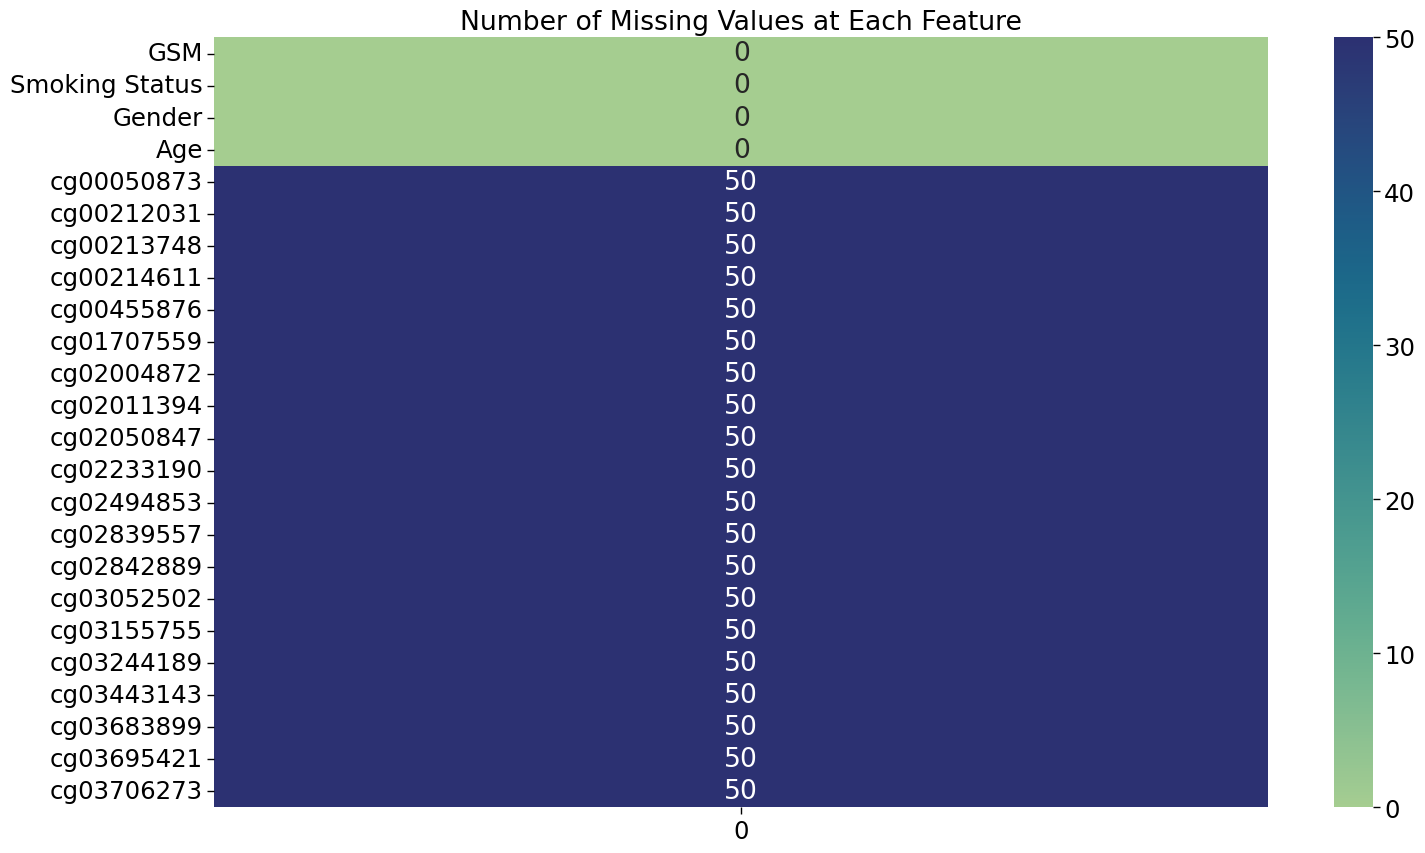

In [50]:
plt.title('Number of Missing Values at Each Feature')
sns.heatmap(data.isna().sum().to_frame(),annot=True, cmap="crest")
data.dropna(inplace=True)
plt.show()

#there are 62 samples in our dataset the are missing all their genetic features

### try and treat those samples:

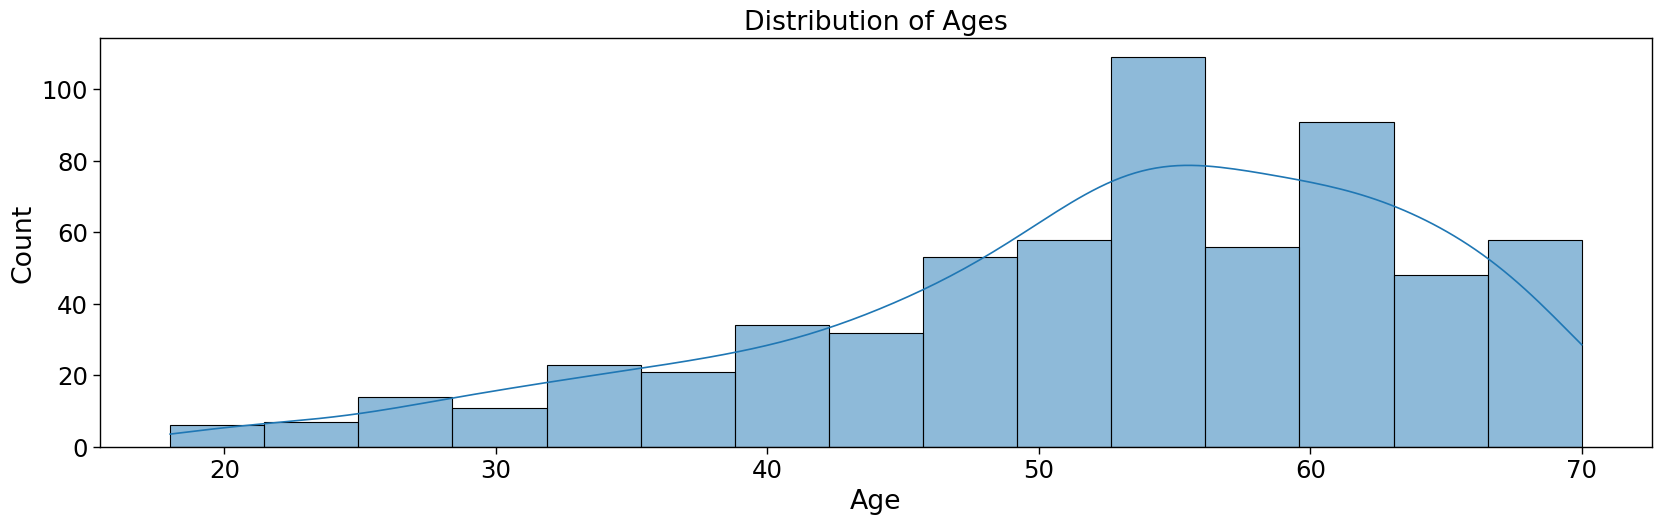

In [51]:
fig = plt.figure()
ax = plt.subplot(212)
ax.set_title('Distribution of Ages')
sns.histplot(data=data['Age'],ax=ax,kde=True)


plt.tight_layout()
plt.show()

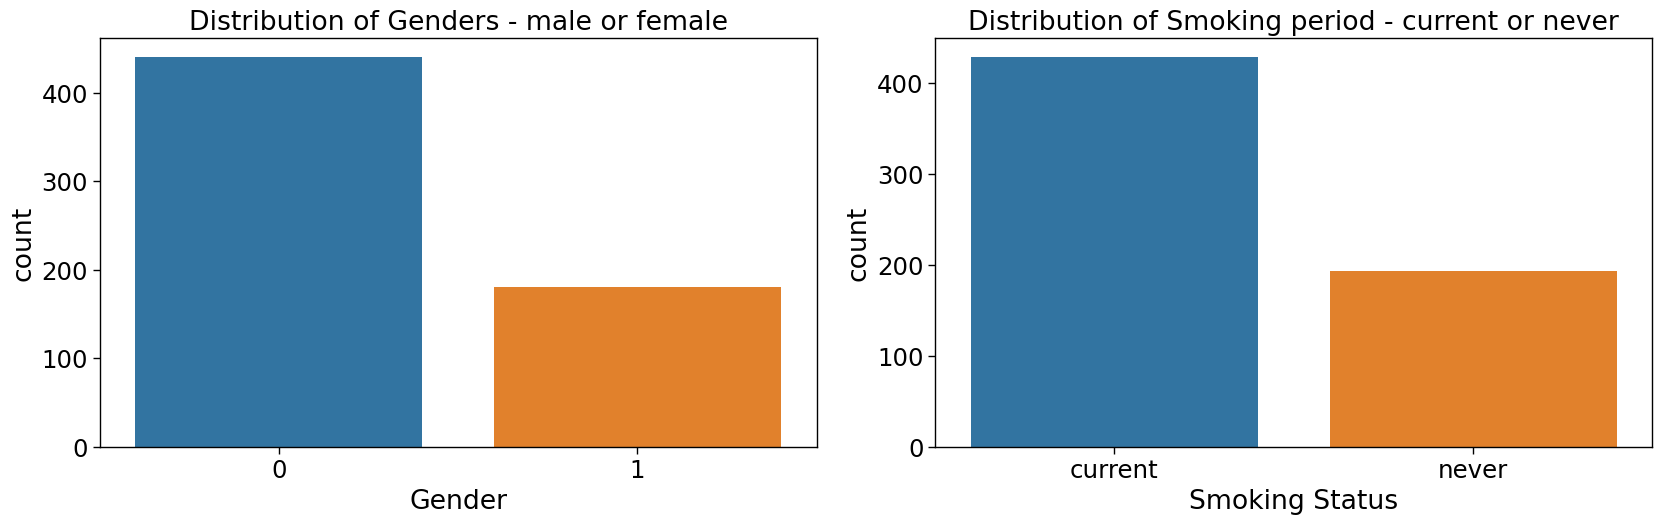

In [52]:
fig = plt.figure()

ax1 = plt.subplot(221)
ax1.set_title('Distribution of Genders - male or female')
sns.countplot(x=data.Gender,ax=ax1)

ax2 = plt.subplot(222)
ax2.set_title('Distribution of Smoking period - current or never')
sns.countplot(x=data['Smoking Status'],ax=ax2)

plt.tight_layout()
plt.show()

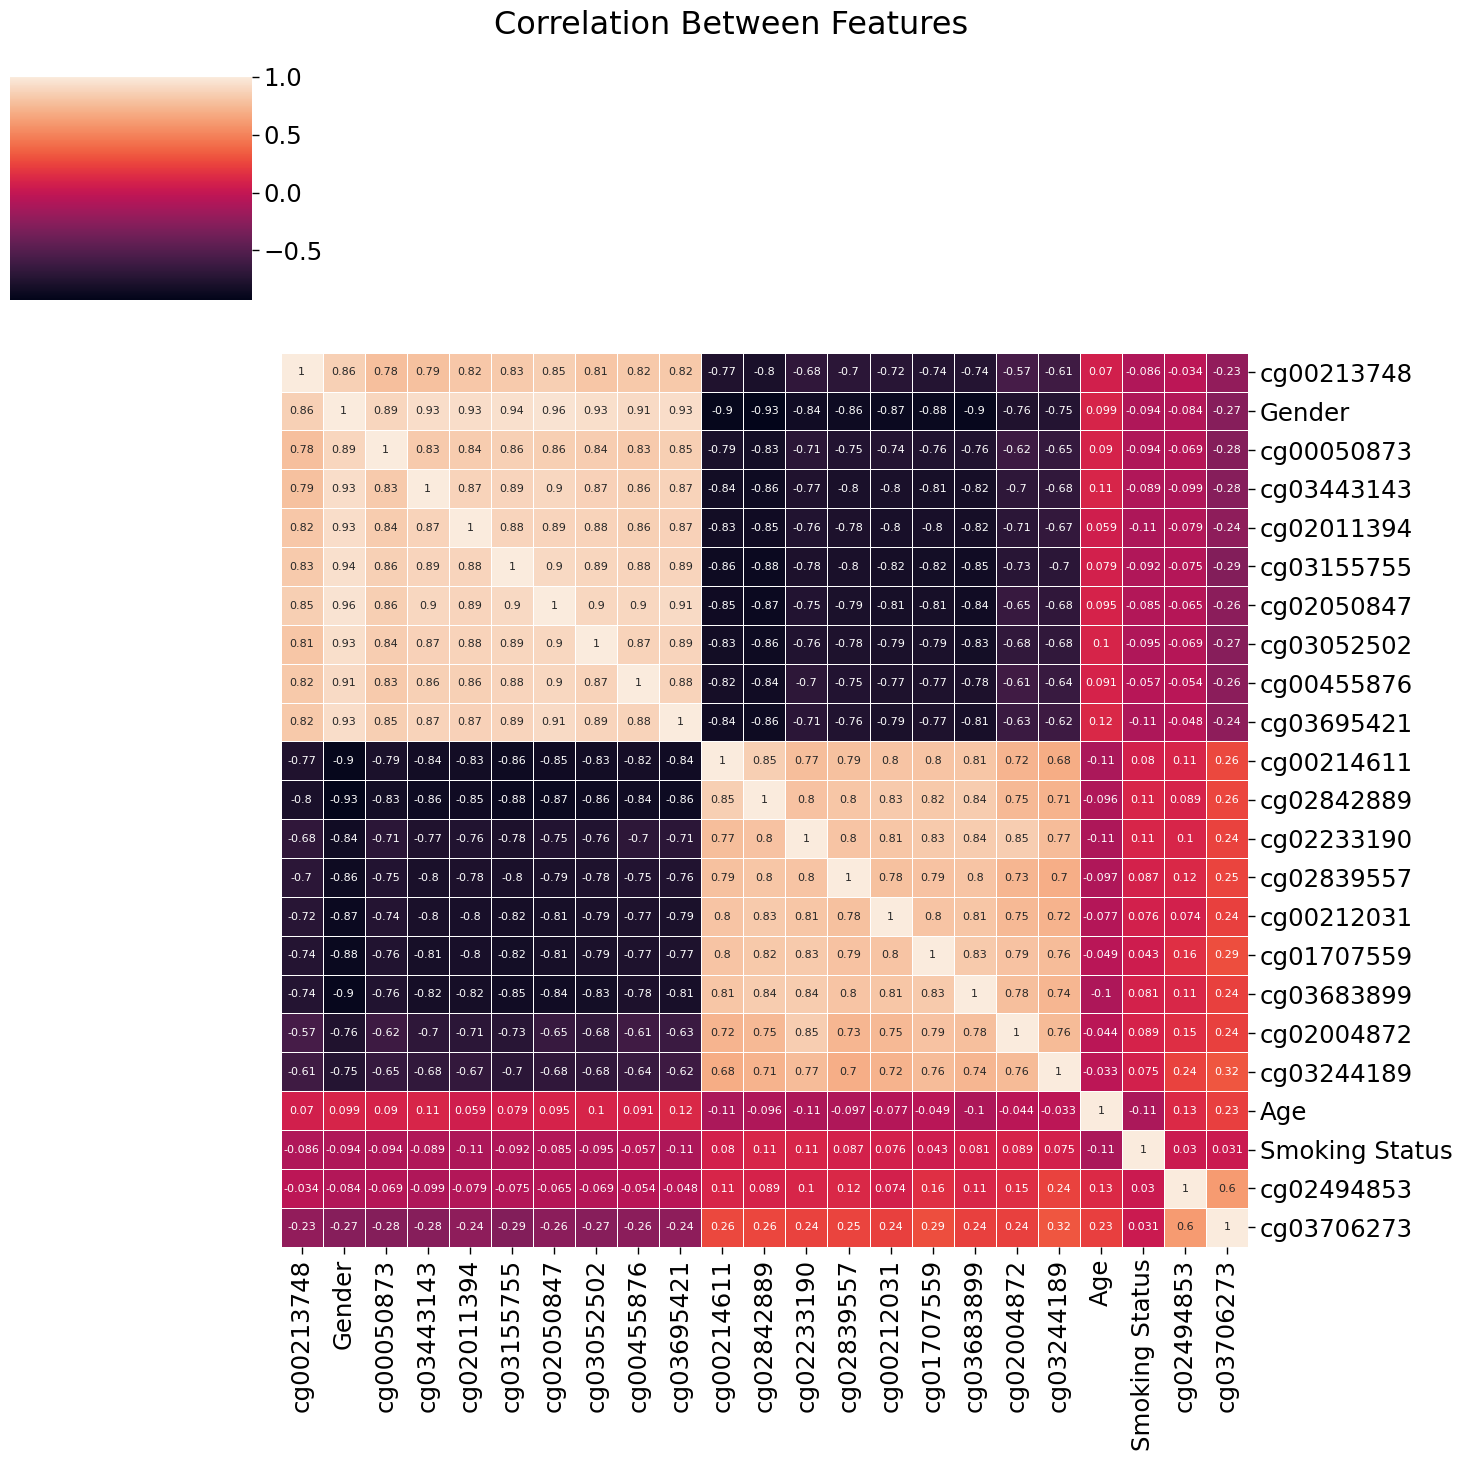

In [22]:
# correlation between features:

#Series.cat.codes - Return Series of codes as well as the index.

data.Gender = data.Gender.astype('category').cat.codes
data['Smoking Status'] = data['Smoking Status'].astype('category').cat.codes

pict = sns.clustermap(data.corr(),linewidth=0.7,figsize=(15,15),annot=True,annot_kws=dict(fontsize=8))
pict.ax_row_dendrogram.set_visible(False) #take out branches
pict.ax_col_dendrogram.set_visible(False)
pict.fig.suptitle('Correlation Between Features') 
pict.fig.tight_layout()
plt.show()

# we see that probes are highly correlated -> we can't seendependence between all the probes 

### So we see our dataset is imbalanced 

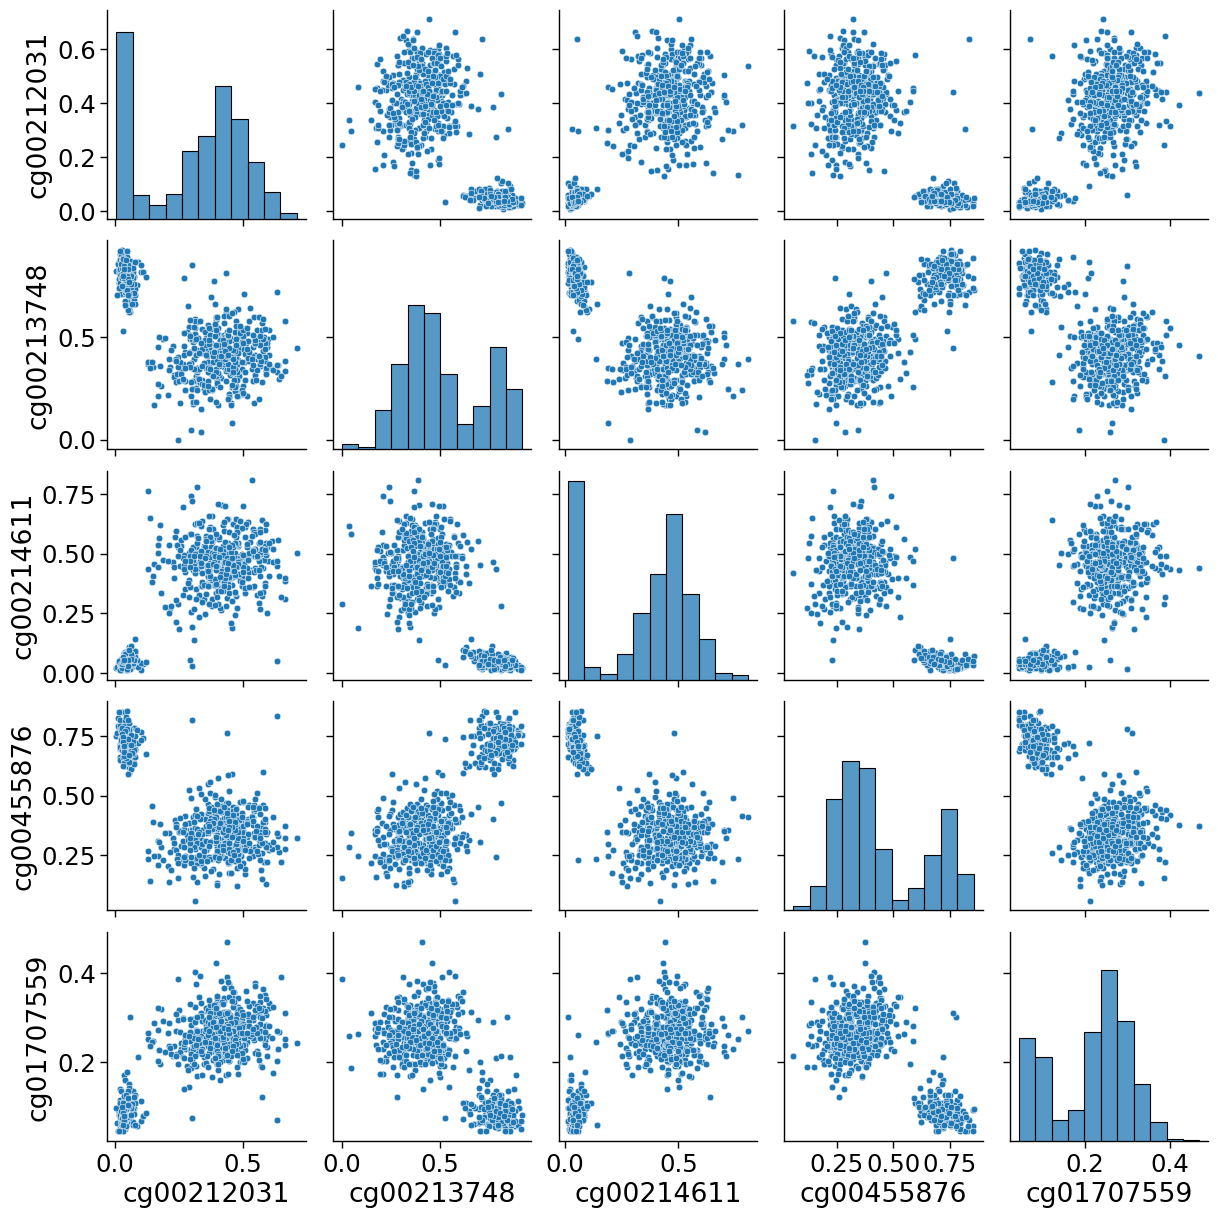

In [53]:
sns.pairplot(data.iloc[:,5:10])

# 2. Let's select the model - RandomForestRegressor

Random forest is an ensemble learning algorithm based on decision tree learners. The estimator fits multiple decision trees on randomly extracted subsets from the dataset and averages their prediction.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

